<h1><center><font face="verdana" color="black">Deep Learning </font></center></h1>


Before we start let's ask ourselves<font size="5" color="blue">why Deep Learning?</font> 

How can I know if Deep Learning works better for a specific problem than SVM for example? <br>
i think it depends on data you have and  What performance score is desired?<br>
As a rule of thumb, I’d say that SVMs are great for relatively small data sets with fewer outliers.on the other hand, deep learning really shines when it comes to complex problems such as image classification, natural language processing, and speech recognition. Another advantage is that you have to worry less about the feature engineering part.<br>
so in my opinion: 
* we start with the simplest model
* If you don’t meet your expected goal, try more complex models (if possible)



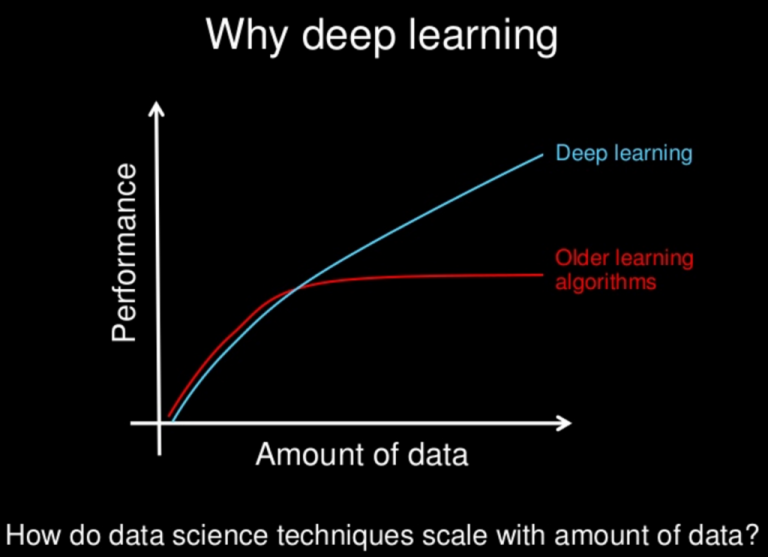

To understand what deep learning is, we first need to understand the relationship deep learning has with machine learning, neural networks, and artificial intelligence.

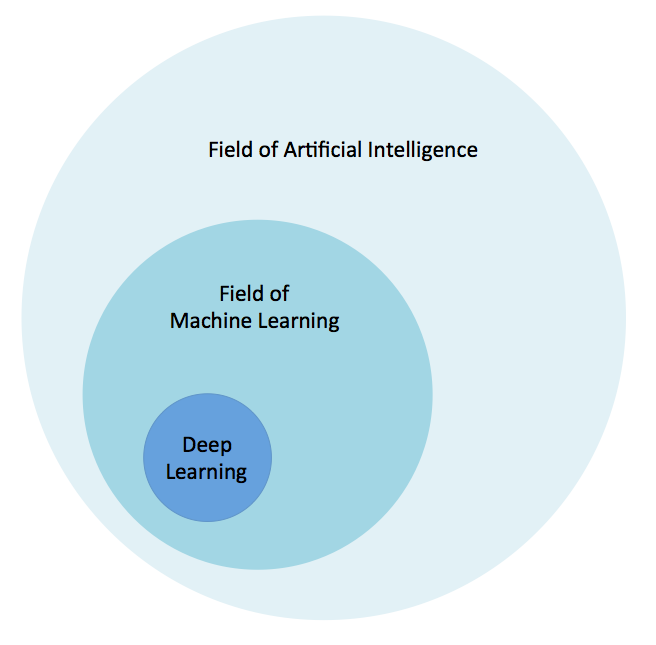

Deep learning is a specific subset of Machine Learning which is using a specific algorithm called a Neural Network<br>
**so What is a neural network?**<br>

Neural Networks inspierd by brain analogies when describing them also small unit of  Neural Networks  look like neurones in brain. Without delving into brain analogies, I find it easier to simply describe Neural Networks as a mathematical function that maps a given input to a desired output.

so let's start with simple example: <br>
we need to predict house prices based on area of house <br>
a simple solution for this problem would be to get the average price per sq ft and multiply it in total area of house <br>
so now we have<br>
* input x we can called it `feature`
* the average price per sq ft we can called it `weight` 
* output this is our prediction value `y`
if we put all together we have this function:<br>
## `y = x*w`

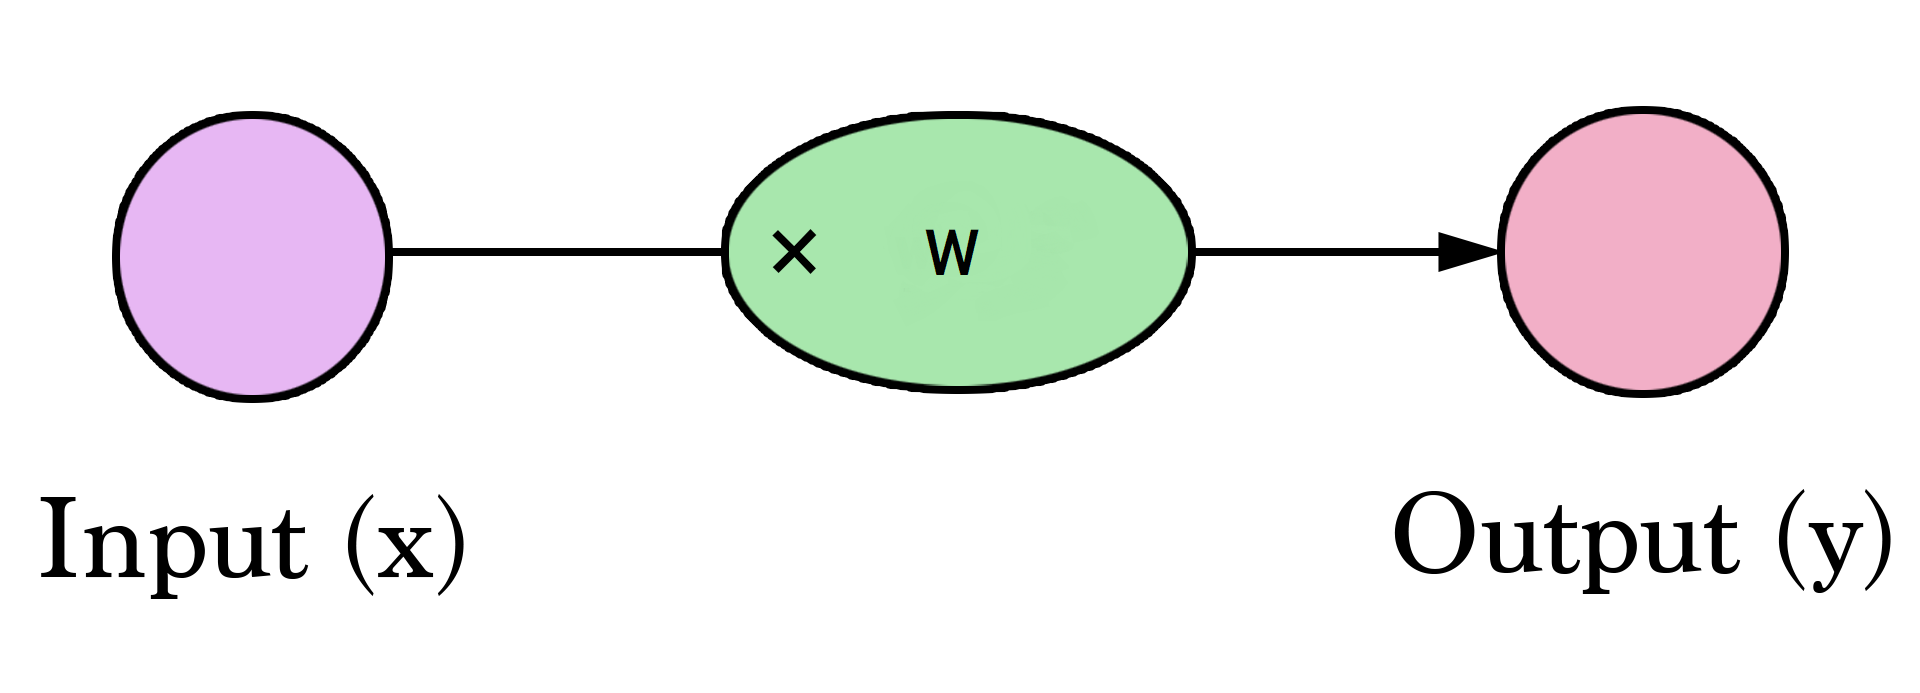

This is simple block of neural network not efficient but this is first one we will make it efficient

as we see weight has great effect on our feature it tell us how much this feature important in our prediction. Here we started with an average, later we’ll look at better algorithms that can scale as we get more inputs and more complicated models

this function will give us line(since the output can be of continuous values, the technical name for what we have would be a “regression model”)

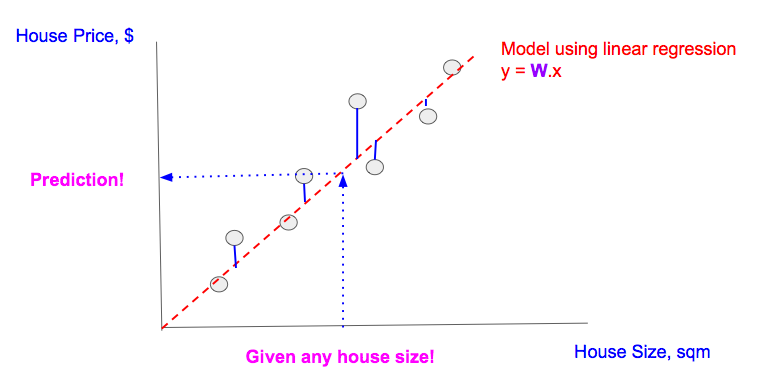

But what if we want to move our line up and down to make your prediction better what we do? <br>
we will add another factor called bias <br>
it just like tell our function hey be ready till i say start

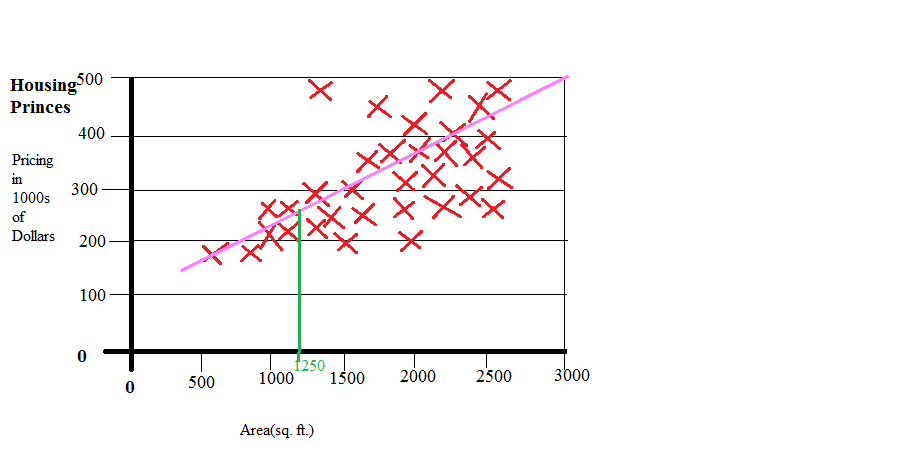

## Classification

let's convert our examble from regression to classification:<br>
we want our model predict this pict is cat or not. what we need? <br>
* we will add function convert our output to (0 or 1) we called this Activation function<br>

and we called our block perceptron


### perceptron

perceptron is asingle layer neaural network it consist of:
* input values or input layer
* weights and bias
* net sum
* acctivation function or ouput layer

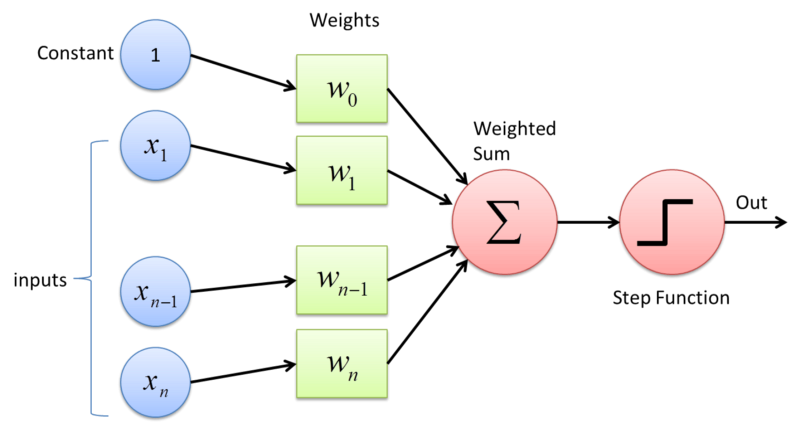

# how does it work?<br>
like before but we don't take average
* Start with random weights
* All the input x are multiplied with their weights 
* Add all the multiplied values and calll it weighted sum
* Apply the weighted sum to the correct activation
   *  if 0 > x it give us 0
   * if x > 0 it give us 1

**ERROR FUNCTION**<br>
we need somthing tell us how much we far from the true point to change our weights and get right one.<br>
Imagine yourself on the top of mountain you cannot see the bottom and you want to down. what will you do?<br>
* We will look around us and considered all the posible direction in which we can walk
* Then we pick adirection that make us close to the bottom 
* After we take a step we start process again and repeat what we did before till we reach the bottom 


so our function should be:
- should be continous
   - if it discrete we cann't take any step as all the posible direction will have the same erorr
- should be differentiable 
   - as we we change our weight and see how this effect on our output which mean rate of change of a function 

to convert from discrete to continuous we apply outputs to sigmoid function which give us numbers fom(0 to 1) represent the probability of this point being positive(class 1) or negative(class 2)

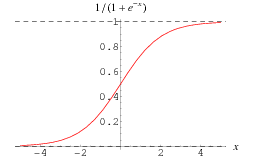

if we have multi-class we use another function called softmax function .
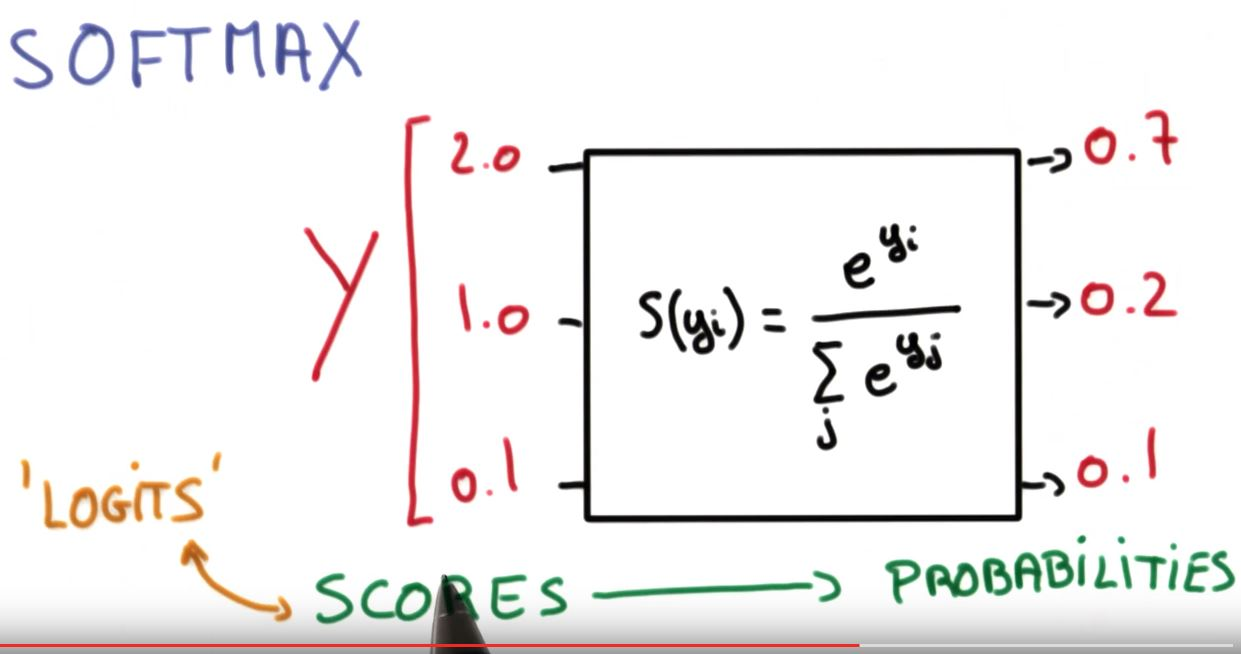

how we pick right model based on their probabilties?<br>
we assume every class is independent event so 
- p(total) = p1 * p2 .....*pn
- but this will give us very small value like (0.00000000122)
- so we will take minus log for every probability as 
  - log(AB) = log(A) + log(B) 
  - we add minus to avoid negative number as log numbe < 1 give us negative value.
- we called this `CROSS ENTROPY`


**CROSS ENTROPY**:
- CROSS ENTROPY is the sum of the negative logarithms of the probability.
- The bad model ==> High cross entropy
- The good model ==> low cross entropy


so let's calculate the error by take differance 
- The total propapilty equal to one
- take the avarge of cross entropy

error = - 1/m (sum((1 - y) log(1 - y_predict) + y log(y_predict)


now we will take differentiation for every point<br>
i will write just finall formula
- aE/aw = -(y - ypredict)xi
- aE/ab = - (y -ypreict)

now we will ubdate our weights and bias to take our step

we called what we did `Gradient Descent`

**psedo code for Gradient Descent**<br>
- start with random weights
- for every point (x1,....,xn)
  - for i = 1 to n:
     - update 
$$ w_i \longrightarrow w_i + \alpha (y - \hat{y}) x_i$$
$$ b \longrightarrow b + \alpha (y - \hat{y})$$
- repeat until to get smallest error

note we add alpha(learning rate) to control in our step we don't want dramatic changes
- if alpha too small we will take too long time
- if it too high we can skip the point we want to reach like we reach the bottom and skip it and move to another mountain because our step is too big


### Now we ready to build deep neural network

It multi-layer of perceptron combine linear models to get complex one

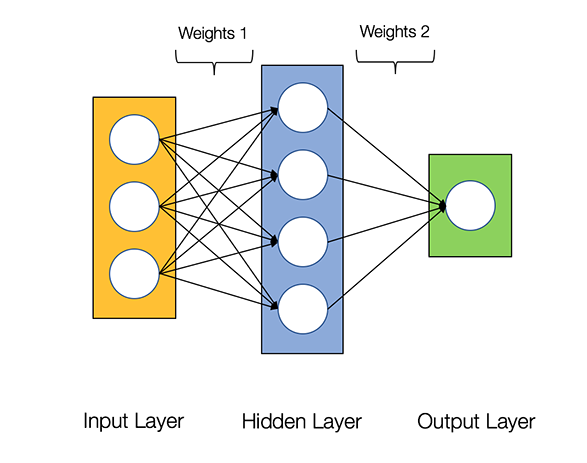

### How we train neural network

**The output y of a simple 2-layer Neural Network is:**<br>
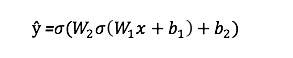
#### You might notice that in the equation above, the weights W and the biases b are the only variables that affects the output y.
#### Naturally, the right values for the weights and biases determines the strength of the predictions. The process of fine-tuning the weights and biases from the input data is known as training the Neural Network.
#### Each iteration of the training process consists of the following steps:
- Calculating the predicted output ŷ, known as feedforward
- Updating the weights and biases, known as backpropagation
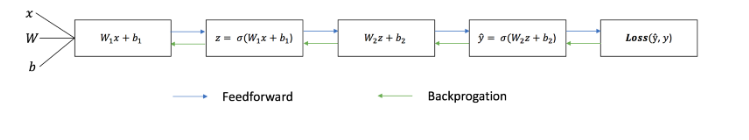

In [3]:
#code to make neural networks and do feed forward
class NeuralNetwork:
    def __init__(self, x, y):
        self.input      = x
        self.weights1   = np.random.rand(self.input.shape[1],4) 
        self.weights2   = np.random.rand(4,1)                 
        self.y          = y
        self.output     = np.zeros(self.y.shape)

    def feedforward(self):
        self.layer1 = sigmoid(np.dot(self.input, self.weights1))
        self.output = sigmoid(np.dot(self.layer1, self.weights2))

**Backpropagation**<br>
Now that we’ve measured the error of our prediction (loss), we need to find a way to propagate the error back, and to update our weights and biases we called this `Backpropagation`<br>
it consist of: <br>
- Doing feed dorward operation
- comparing the output of the model with the desierd output
- calculating the error
- running the feed forward operation backword
- use this to update model and get better result
- repeat until get good result




In [4]:
# code with back propagation
class NeuralNetwork:
    def __init__(self, x, y):
        self.input      = x
        self.weights1   = np.random.rand(self.input.shape[1],4) 
        self.weights2   = np.random.rand(4,1)                 
        self.y          = y
        self.output     = np.zeros(self.y.shape)

    def feedforward(self):
        self.layer1 = sigmoid(np.dot(self.input, self.weights1))
        self.output = sigmoid(np.dot(self.layer1, self.weights2))

    def backprop(self):
        # application of the chain rule to find derivative of the loss function with respect to weights2 and weights1
        d_weights2 = np.dot(self.layer1.T, (2*(self.y - self.output) * sigmoid_derivative(self.output)))
        d_weights1 = np.dot(self.input.T,  (np.dot(2*(self.y - self.output) * 
                                                   sigmoid_derivative(self.output), self.weights2.T) *
                                            sigmoid_derivative(self.layer1)))
         # update the weights with the derivative (slope) of the loss function
        self.weights1 += d_weights1
        self.weights2 += d_weights2

### How to optmize the training model ?

note number of steps or how many time we update weights and bias is called (Epoch)
- if we start with (epoch = 1) , we will get simple model cannot predict so well which called `under fitting`
- if we train (epoch = 20) we can get pretty good result
- if we train(epoch = 1000) we can get good result on train data set but bad result in test data set which called `over fitting`
so we run our grade decent untill the testing errors stops decreasing and start increase.<br>
and we will try some methods to prevent over fitting


**Regularization***<br>
Regularization modifies the Error function by adding additional terms that penalize large weights. In other words, we change the Error function so that it becomes<br>
- Error+λ(|w|+ ....+|wn|), where λ is the regularization strength (a hyper-parameter for the learning algorithm).this is called `L1`
- Error+λ (w**2 + ....+wn**2) this is called `L2`
- The value we choose for λ determines how much we want to protect against overfitting. 
  - lambda is larg ==> we penalized them alot
  - lambda is small ==> we not penalized them alot<br>
  
we can try l1 or l2 to prevent over fitting

**Dropout**<br>
This is another way to prevent overfitting<br>
when we train our model somtimes <br>
- one part has larg weight and ends up dominating
- another part dosenot

so we do somthing called drop out which mean turn off dominate part and train our neural network<br>
in real what we do is give the algorithm paramete which is the probailty that each node get dropped<br>
we repeat this so every node will treat in equality

### local minimum problem<br>
som times we have local minimum which mean alot of point look like bottom so what we do ?


**Random Restart**<br>
one way to solve local minimum <br>
- we start from differant places and take gradient descend from all of them

This increase the probabilty that we get the gloable minimum


## sigmoid problem

if we calculate the derivative at point away at the right or away at left we will get small value this not good for gradient descent this will take long time<br>
so except ouput layer we will change sigmoid and add another activation function like
- HyperBolic Tangent function
- RECTIFIED LINEAR UNIT (RELU)
